<a href="https://colab.research.google.com/github/DanielMartinAlarcon/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

Variables
- Income
- Lifespan

- Population
- Year
- Country

## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 23.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [6]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

income.shape, lifespan.shape, population.shape, entities.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33))

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [14]:
df=pd.merge(income, lifespan)
df = pd.merge(df, population)

variables = ['country', 'name', 'world_6region']

df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [17]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [20]:
china = df[df.country=='China']
china[china.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


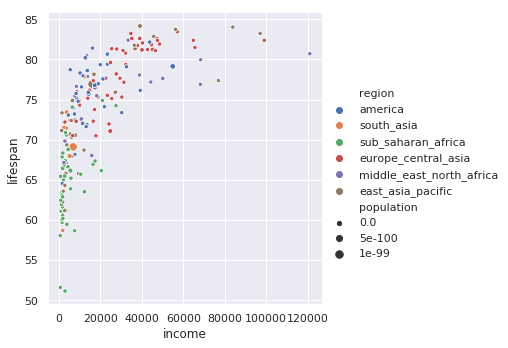

In [57]:
# df[df.year.isin([2018])]
now = df[df.year==2018]
ax = sns.relplot(x="income", y="lifespan",
                     hue="region", size="population",
                     data=now)

# ax.set(xscale="log")

In [0]:
centuries = df[df.year.isin([1818, 1918, 2018])]

df['population'] = df['population']/1000000
now = df[df.year==2018]

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()

ax.scatter(x="income", y="lifespan",
                     c="region",
                     data=now, sizes=(5,500));

qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

ax.set(xscale="log");
plt.text(x=qatar_income+10000, y=qatar_lifespan, s="Quatar");
plt.ylim((20,90));


# Assignment work

I wanted to get a good grip on Matplotlib before going on to anything fancier, so I used this occasion to focus on the basics.

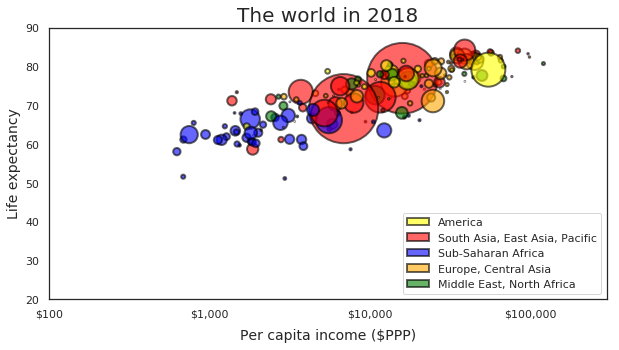

In [180]:
"""
I want the bubble sizes to be proportional to population.  
The first step is to create a new column with percentile population,
which I can then feed into a size parameter when building the bubble chart.
It looks like the parameter "s", for size, is already in unites of area,
so I can make that directly proportional to the population.
"""

import matplotlib as mpl

# I added the multiplier in pop_normal to make the bubbles whichever size 
# seemed most appropriate.
df['pop_normal'] = 5000*df['population'] / max(df['population'])
now = df[df.year==2018]

# I created a dictionary of regional colors
colors = {'america':'yellow', 'south_asia':'red', 'sub_saharan_africa':'blue',
       'europe_central_asia':'orange', 'middle_east_north_africa':'green',
       'east_asia_pacific':'red'}

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x="income", y="lifespan", data=now, s='pop_normal', alpha=0.6,
          c=now['region'].apply(lambda x: colors[x]),
          linewidth=2, edgecolor='black');

# Being able to set a custom axis label was NOT trivial.  This is Darwin's
# solution, which still only sorta makes sense to me.
ax.set_xscale('log')
ax.set(ylim=(20,90),xlim=(100,300000))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_title('The world in 2018', fontdict={'fontsize':20});
ax.set_xlabel('Per capita income ($PPP)', fontdict={'fontsize':14}, labelpad=10);
ax.set_ylabel('Life expectancy', fontdict={'fontsize':14});


# Creating a custom legend for this one requires craeting a list of Patch objects.

legend_colors = {'America':'yellow', 'South Asia, East Asia, Pacific':'red', 
                 'Sub-Saharan Africa':'blue','Europe, Central Asia':'orange', 
                 'Middle East, North Africa':'green'}

patch_list =[]
for region, color in legend_colors.items():
  patch_list.append(mpl.patches.Patch(facecolor=color, label=region, alpha=0.6, 
                                      linewidth=2, edgecolor='black'))

ax.legend(handles=patch_list, loc='lower right', bbox_to_anchor=(1,0));
#Legen... wait for it... DARY.